In [1]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import sklearn
# import seaborn as sns; sns.set()


# from lifelines import KaplanMeierFitter

# from lifelines.utils import median_survival_times

# from lifelines.statistics import pairwise_logrank_test

from sklearn.preprocessing import OneHotEncoder

In [2]:
training_df = pd.read_csv("training_data.csv")
# macro_df = pd.read_csv("macro_data.csv")
macro_data = pd.read_csv("macro_data.csv",skiprows = range(1,8))
macro_data["Mnemonic"] = pd.to_datetime(macro_data["Mnemonic"])
macro_data["Mnemonic"] = macro_data["Mnemonic"].apply(lambda x: int(x.strftime('%Y%m')))
macro_data.head()

C:\Users\billy\AppData\Local\Temp\ipykernel_16600\3729541786.py:1: DtypeWarning: Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.
  training_df = pd.read_csv("training_data.csv")


Mnemonic  M_FHOFHOPIPOQ.IUSA  M_FYLE.IUSA  M_FRT.IUSA  M_FYPSAVQ.IUSA  \
0    200001          136.384471     5715.426    2921.232             5.0   
1    200002          136.175916     5754.412    2965.596             4.5   
2    200003          137.238976     5777.722    2997.900             4.3   
3    200004          138.189028     5787.542    2949.972             4.8   
4    200005          138.787406     5772.214    2954.412             4.8   

   M_FC.IUSA  FYPCPICA_FEDB.IUSA   M_FGDP.IUSA  M_FYHHAVGQ.IUSA  \
0   6542.870         29747.16297   9914.297967      79259.05028   
1   6625.259         29943.16651   9989.058091      79784.01732   
2   6686.521         30136.36473  10103.183660      80309.11267   
3   6679.067         30326.88986  10177.387220      80643.86257   
4   6709.732         30508.25037  10265.088090      80969.88063   

   M_FYFMMEDQ.IUSA  ...  M_FBCFCOFCCQ.IUSA  M_FETP.IUSA  M_FLTV.IUSA  \
0      51147.36716  ...           4.562116      110.434    78.900002   
1      51287.26889  ...           4.531455      110.525    78.900002   
2      51422.36774  ...           4.376417      110.863    78.400002   
3      51553.75004  ...           4.169691      111.086    78.300003   
4      51677.16706  ...           4.031345      110.958    78.400002   

    M_FC$.IUSA  M_FEIAMGTTQ.IUSA  M_FXCPMGASUQ.IUSA  M_FRBBBQ.IUSA  \
0  8450.176371           1.32860         131.753937       8.074702   
1  8531.737106           1.41475         140.055069       8.189753   
2  8580.387368           1.55575         153.445095       8.338543   
3  8569.820795           1.50575         150.435879       8.469916   
4  8610.546128           1.52640         150.625958       8.509325   

   M_FHOWNRQ.IUSA  M_FIFR_FEDS.IUSA  M_FIFR$_FEDS.IUSA  
0       67.062138        481.331342         654.113753  
1       67.093048        484.649042         654.796053  
2       67.144365        486.748616         654.968193  
3       67.215255        487.541377         654.183206  
4       67.298718        486.974022         651.820675  

[5 rows x 97 columns]

In [3]:
training_df.head()

financial_active net_payment_behaviour_tripd  promotion_flag  \
0               1.0                           P               0   
1               0.0                           P               0   
2               1.0                           T               0   
3               1.0                           T               0   
4               1.0                           P               0   

   variable_rate_index account_status_code  active_12_mths  \
0                    0               I 0-6             1.0   
1                    0               I 0-6             1.0   
2                    0              I 7-12             1.0   
3                    1               I 0-6             1.0   
4                    0                   A             0.0   

  bank_fico_buckets_20  charge_off_reason_code  mob  open_closed_flag  ...  \
0              581-600                     NaN    3               1.0  ...   
1              721-740                     NaN  159               1.0  ...   
2                 761+                     NaN   22               1.0  ...   
3                 761+                     NaN   16               1.0  ...   
4              721-740                     NaN    3               1.0  ...   

   due_balance_2  due_balance_3  due_balance_4  due_balance_5  due_balance_6  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   due_balance_7  due_balance_8  snapshot  mth_code  industry  
0            0.0            0.0    201801    201807         B  
1            0.0            0.0    201801    201906         C  
2            0.0            0.0    201801    201905         A  
3            0.0            0.0    201801    201806         B  
4            0.0            0.0    201801    201902         B  

[5 rows x 69 columns]

In [4]:
def delta_month(x):
    if x > 12:
        month = x - 100 + 12
    else: 
        month = x
    return(month)

In [5]:
training_df["month"] = (training_df["mth_code"] - training_df["snapshot"]).apply(delta_month)

In [6]:
training_df.head(20)

financial_active net_payment_behaviour_tripd  promotion_flag  \
0                1.0                           P               0   
1                0.0                           P               0   
2                1.0                           T               0   
3                1.0                           T               0   
4                1.0                           P               0   
5                1.0                           T               1   
6                1.0                           T               1   
7                1.0                           I               0   
8                1.0                           P               0   
9                1.0                           T               1   
10               1.0                           P               0   
11               0.0                           P               1   
12               1.0                           P               0   
13               1.0                           P               0   
14               1.0                           P               0   
15               1.0                           T               1   
16               1.0                           P               0   
17               1.0                           I               0   
18               0.0                           I               0   
19               0.0                           I               1   

    variable_rate_index account_status_code  active_12_mths  \
0                     0               I 0-6             1.0   
1                     0               I 0-6             1.0   
2                     0              I 7-12             1.0   
3                     1               I 0-6             1.0   
4                     0                   A             0.0   
5                     0                   A             1.0   
6                     1             I 13-24             1.0   
7                     1              I 7-12             1.0   
8                     1                   A             1.0   
9                     1                   A             1.0   
10                    0                   A             1.0   
11                    1                   A             1.0   
12                    0               I 0-6             1.0   
13                    0                   A             1.0   
14                    1                   A             1.0   
15                    1                   A             1.0   
16                    0                   A             1.0   
17                    0              I 7-12             1.0   
18                    0                   A             1.0   
19                    0                   A             1.0   

   bank_fico_buckets_20  charge_off_reason_code  mob  open_closed_flag  ...  \
0               581-600                     NaN    3               1.0  ...   
1               721-740                     NaN  159               1.0  ...   
2                  761+                     NaN   22               1.0  ...   
3                  761+                     NaN   16               1.0  ...   
4               721-740                     NaN    3               1.0  ...   
5               661-680                     NaN  243               1.0  ...   
6               581-600                     NaN    3               1.0  ...   
7                  761+                     NaN   40               1.0  ...   
8                  761+                     NaN   56               1.0  ...   
9                  761+                     NaN   17               1.0  ...   
10              721-740                     NaN    6               1.0  ...   
11              721-740                     NaN   12               1.0  ...   
12              601-620                     NaN   22               1.0  ...   
13              701-720                     NaN   33               1.0  ...   
14              621-640                     NaN    5              

In [7]:
training_df["charge_off"].value_counts()

0    5742525
1      15698
Name: charge_off, dtype: int64

In [8]:
training_df.columns

Index(['financial_active', 'net_payment_behaviour_tripd', 'promotion_flag',
       'variable_rate_index', 'account_status_code', 'active_12_mths',
       'bank_fico_buckets_20', 'charge_off_reason_code', 'mob',
       'open_closed_flag', 'ever_delinquent_flg', 'nbr_mths_due',
       'variable_rate_margin', 'stmt_balance', 'prev_balance', 'net_sales',
       'net_payments', 'purchase_active', 'credit_limit_amt',
       'credit_limit_pa', 'closed', 'active', 'charge_off', 'charge_off_aged',
       'charge_off_bk', 'principal_amt', 'principal_amt_chrg_off',
       'total_writeoff_amt', 'fee_chg_off_reversal_amt', 'net_finance_charge',
       'non_principal_amount_gross', 'non_principal_amount_net',
       'non_principal_amount_stmt', 'aged_writeoff_amt',
       'bankruptcy_writeoff_amt', 'fc_reversals', 'fee_reversals',
       'fraud_writeoff_amt', 'other_writeoff_amt', 'promo_bal_amt',
       'recovery_amt', 'writeoff_type_bko', 'writeoff_type_fraud_kiting',
       'writeoff_type_fraud_s

In [9]:
macro_data.head()

Mnemonic  M_FHOFHOPIPOQ.IUSA  M_FYLE.IUSA  M_FRT.IUSA  M_FYPSAVQ.IUSA  \
0    200001          136.384471     5715.426    2921.232             5.0   
1    200002          136.175916     5754.412    2965.596             4.5   
2    200003          137.238976     5777.722    2997.900             4.3   
3    200004          138.189028     5787.542    2949.972             4.8   
4    200005          138.787406     5772.214    2954.412             4.8   

   M_FC.IUSA  FYPCPICA_FEDB.IUSA   M_FGDP.IUSA  M_FYHHAVGQ.IUSA  \
0   6542.870         29747.16297   9914.297967      79259.05028   
1   6625.259         29943.16651   9989.058091      79784.01732   
2   6686.521         30136.36473  10103.183660      80309.11267   
3   6679.067         30326.88986  10177.387220      80643.86257   
4   6709.732         30508.25037  10265.088090      80969.88063   

   M_FYFMMEDQ.IUSA  ...  M_FBCFCOFCCQ.IUSA  M_FETP.IUSA  M_FLTV.IUSA  \
0      51147.36716  ...           4.562116      110.434    78.900002   
1      51287.26889  ...           4.531455      110.525    78.900002   
2      51422.36774  ...           4.376417      110.863    78.400002   
3      51553.75004  ...           4.169691      111.086    78.300003   
4      51677.16706  ...           4.031345      110.958    78.400002   

    M_FC$.IUSA  M_FEIAMGTTQ.IUSA  M_FXCPMGASUQ.IUSA  M_FRBBBQ.IUSA  \
0  8450.176371           1.32860         131.753937       8.074702   
1  8531.737106           1.41475         140.055069       8.189753   
2  8580.387368           1.55575         153.445095       8.338543   
3  8569.820795           1.50575         150.435879       8.469916   
4  8610.546128           1.52640         150.625958       8.509325   

   M_FHOWNRQ.IUSA  M_FIFR_FEDS.IUSA  M_FIFR$_FEDS.IUSA  
0       67.062138        481.331342         654.113753  
1       67.093048        484.649042         654.796053  
2       67.144365        486.748616         654.968193  
3       67.215255        487.541377         654.183206  
4       67.298718        486.974022         651.820675  

[5 rows x 97 columns]

In [10]:
macro_data.columns

Index(['Mnemonic', 'M_FHOFHOPIPOQ.IUSA', 'M_FYLE.IUSA', 'M_FRT.IUSA',
       'M_FYPSAVQ.IUSA', 'M_FC.IUSA', 'FYPCPICA_FEDB.IUSA', 'M_FGDP.IUSA',
       'M_FYHHAVGQ.IUSA', 'M_FYFMMEDQ.IUSA', 'FHCSWHPIQ_FEDB.IUSA',
       'M_FUNI.IUSA', 'M_FYPQ.IUSA', 'M_FYHHMEDQ.IUSA', 'M_FLBR.IUSA',
       'M_FGDP$.IUSA', 'M_FYPDPI$Q.IUSA', 'M_FSDEBT.IUSA', 'M_FSFORQ.IUSA',
       'M_FCCALLQ.IUSA', 'M_FCCREVQ.IUSA', 'M_FCCNREVQ.IUSA', 'M_FRTFS.IUSA',
       'M_FRTFSX.IUSA', 'M_FRTINETQ.IUSA', 'M_FCNGFO$.IUSA', 'M_FCNGFO.IUSA',
       'M_FCSMED$.IUSA', 'M_FCSMED.IUSA', 'M_FET.IUSA', 'M_FLBF_POT.IUSA',
       'M_FLBUK15GQ.IUSA', 'M_FLBF.IUSA', 'M_FLBE.IUSA', 'M_FLBU.IUSA',
       'M_FLBT.IUSA', 'M_FBKP.IUSA', 'M_FBKPY.IUSA', 'M_FBKB.IUSA',
       'M_FBKBY.IUSA', 'M_FRFED.IUSA', 'M_FRGT5Y.IUSA', 'M_FRGT10Y.IUSA',
       'M_FYPDPIQ.IUSA', 'M_FAWHTP.IUSA', 'M_FAHETP.IUSA', 'M_FYPEWS$Q.IUSA',
       'M_FAWOMF.IUSA', 'M_FECICCQ.IUSA', 'M_FCPIU.IUSA', 'M_FCPIUL1E.IUSA',
       'M_FTAXFP.IUSA', 'M_FHOFHOPIQ.IUS

## Important steps

- feature engineering
- binning variables
- 

In [11]:
print(training_df.dtypes.to_string())

financial_active                 float64
net_payment_behaviour_tripd       object
promotion_flag                     int64
variable_rate_index                int64
account_status_code               object
active_12_mths                   float64
bank_fico_buckets_20              object
charge_off_reason_code           float64
mob                                int64
open_closed_flag                 float64
ever_delinquent_flg              float64
nbr_mths_due                     float64
variable_rate_margin             float64
stmt_balance                     float64
prev_balance                     float64
net_sales                        float64
net_payments                     float64
purchase_active                  float64
credit_limit_amt                 float64
credit_limit_pa                  float64
closed                             int64
active                             int64
charge_off                         int64
charge_off_aged                    int64
charge_off_bk   

In [12]:
print(training_df.isna().sum().to_string())

financial_active                       0
net_payment_behaviour_tripd            0
promotion_flag                         0
variable_rate_index                    0
account_status_code                    0
active_12_mths                         0
bank_fico_buckets_20                   0
charge_off_reason_code           5758209
mob                                    0
open_closed_flag                       4
ever_delinquent_flg                    0
nbr_mths_due                           0
variable_rate_margin             4208656
stmt_balance                           0
prev_balance                           0
net_sales                              0
net_payments                           0
purchase_active                        0
credit_limit_amt                       0
credit_limit_pa                        0
closed                                 0
active                                 0
charge_off                             0
charge_off_aged                        0
charge_off_bk   

In [13]:
training_df.drop(["charge_off_reason_code", "variable_rate_margin", "writeoff_date"], axis=1, inplace=True)

In [14]:
training_df["net_finance_charge"].fillna(0, inplace=True)

In [15]:
training_df.loc[training_df["open_closed_flag"].isna(), "charge_off"]

5715627    0
5744168    0
5750722    0
5752800    0
Name: charge_off, dtype: int64

In [16]:
training_df = training_df[training_df["open_closed_flag"].notnull()]

In [17]:
training_df.reset_index(inplace=True, drop = True)

In [18]:
training_df.isna().sum().sum()

0

In [19]:
pd.crosstab(training_df["closed"], training_df["open_closed_flag"])

open_closed_flag    0.0      1.0
closed                          
0                 83007  5675174
1                     0       38

In [20]:
pd.crosstab(training_df["closed"], training_df["active"])

active      0        1
closed                
0       15736  5742445
1           0       38

In [21]:
pd.crosstab(training_df["open_closed_flag"], training_df["active"])

active                0        1
open_closed_flag                
0.0                4892    78115
1.0               10844  5664368

training_df.drop([
    "net_payment_behaviour_tripd", 
    "account_status_code", 
    "bank_fico_buckets_20",
    "industry",
    "snapshot",
    "mth_code",
    "month"
], axis=1).corr()

<AxesSubplot:xlabel='charge_off', ylabel='principal_amt_chrg_off'>

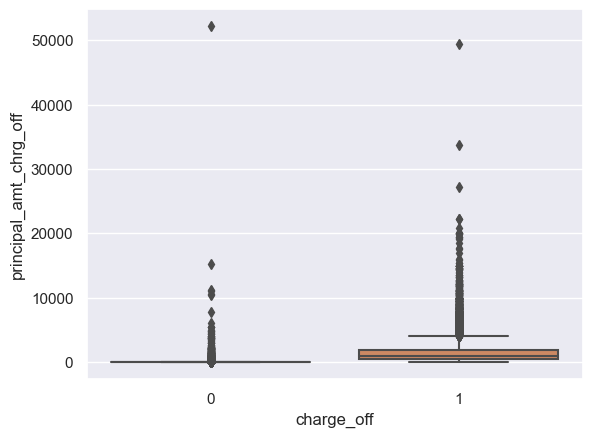

In [22]:
sns.boxplot(y="principal_amt_chrg_off", x="charge_off", data=training_df)

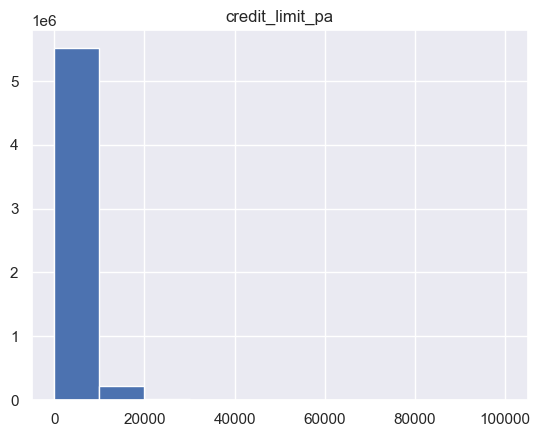

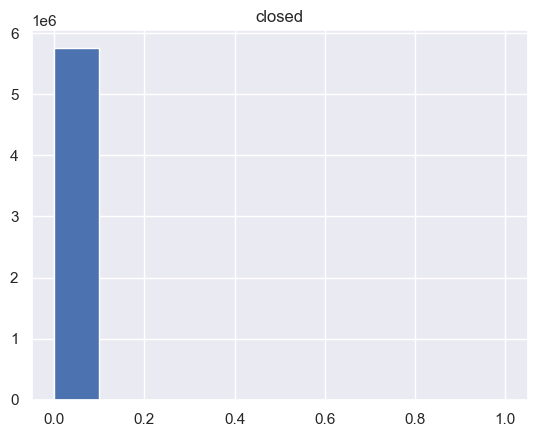

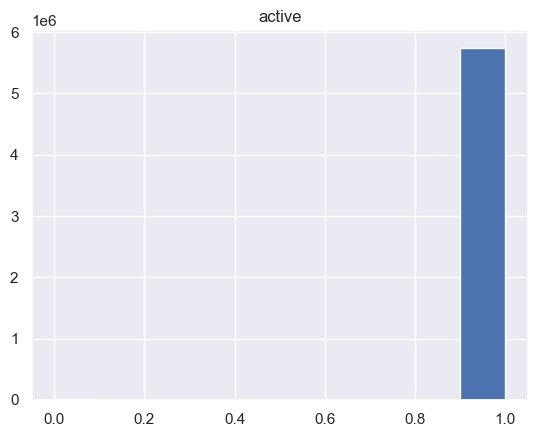

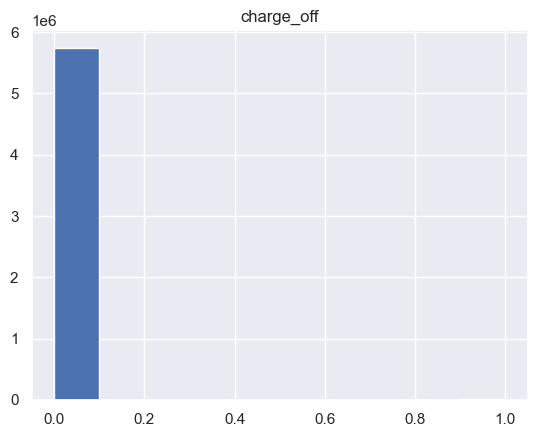

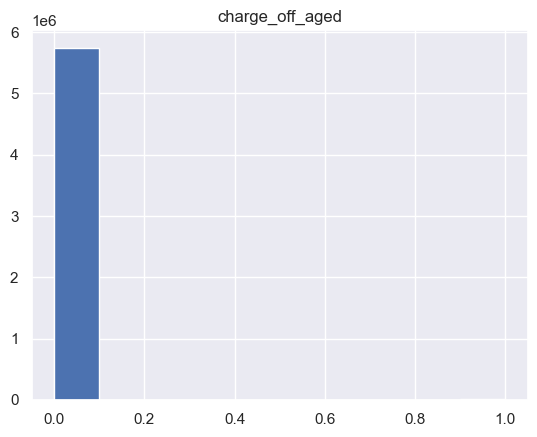

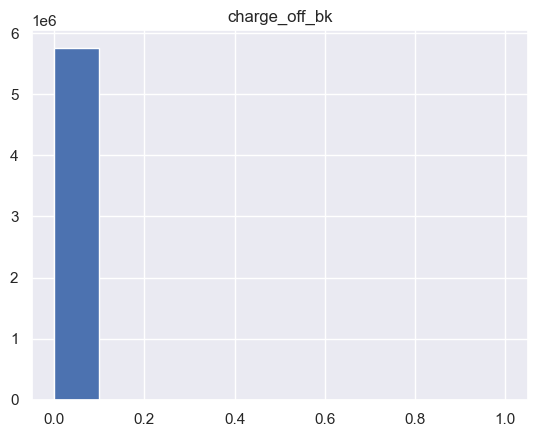

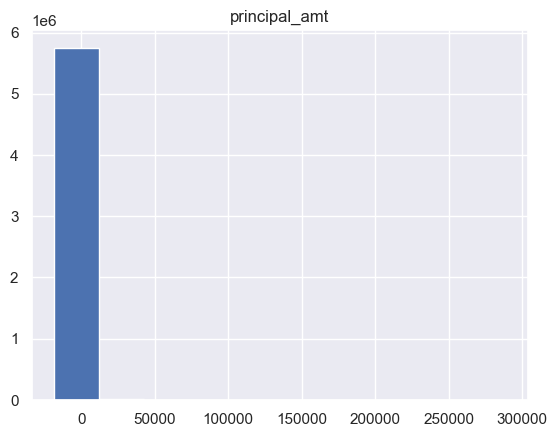

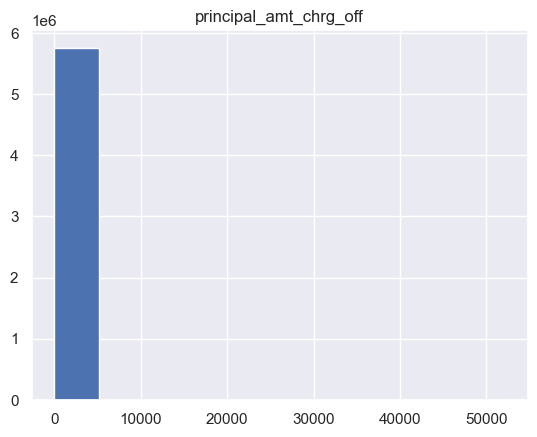

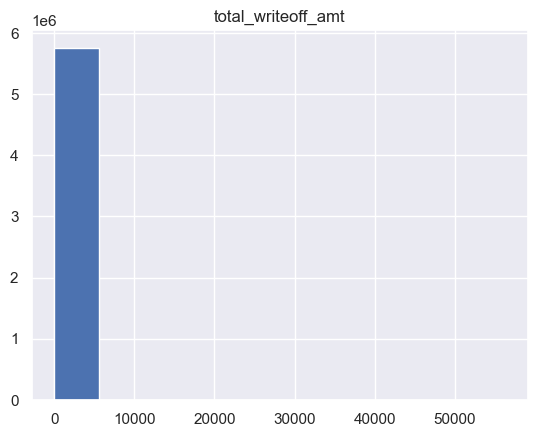

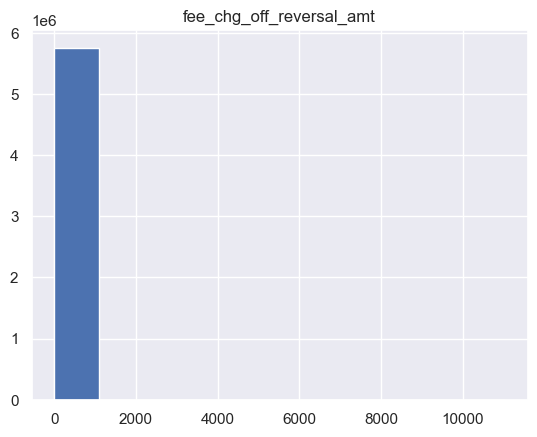

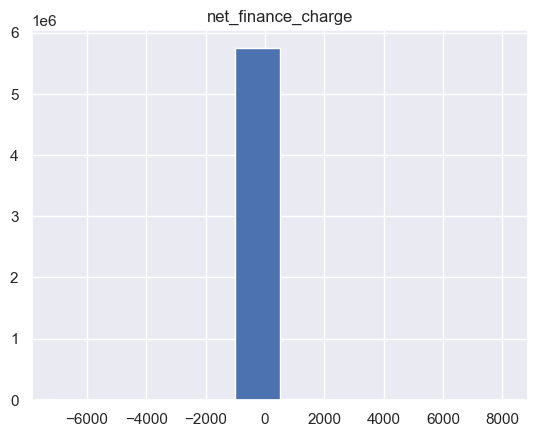

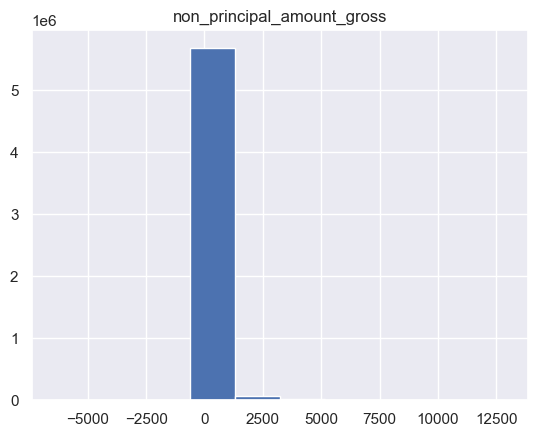

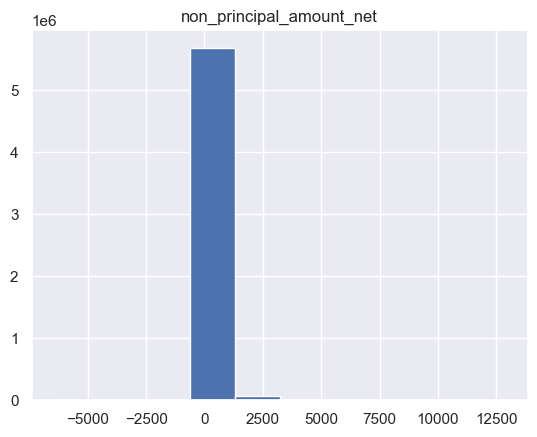

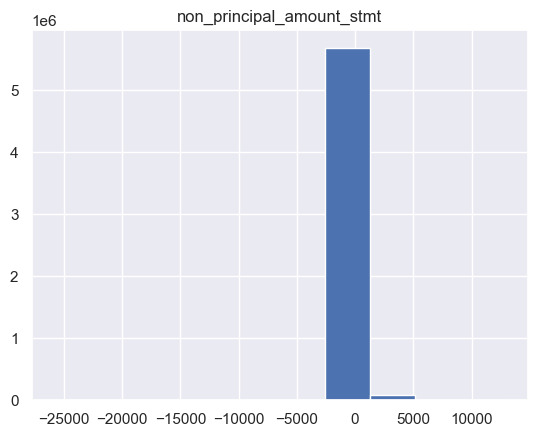

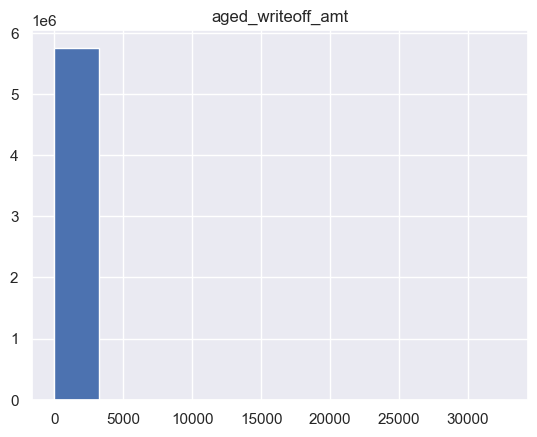

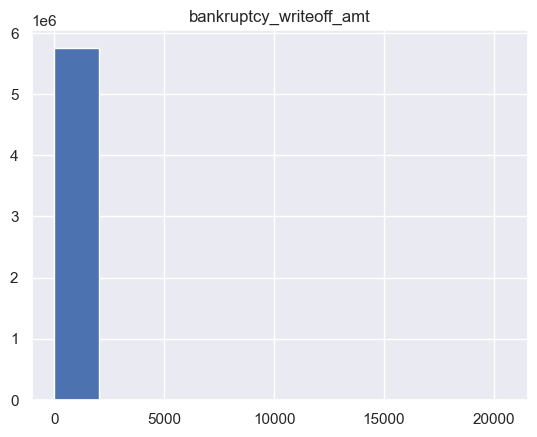

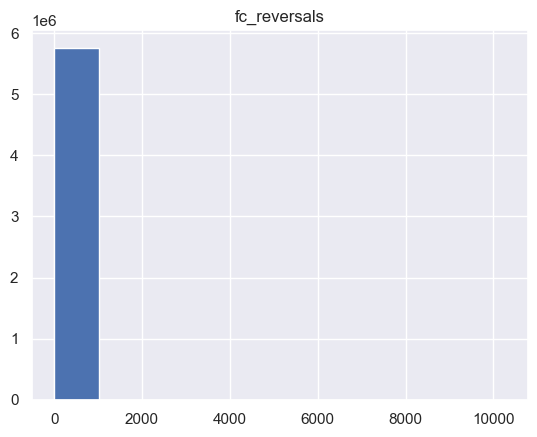

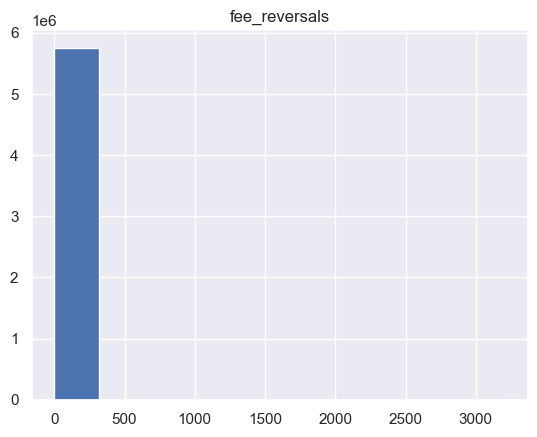

In [23]:
for i in range(17, 35):
    plt.hist(training_df.iloc[:,i])
    plt.title(training_df.columns[i])
    plt.show()

In [24]:
kmf = KaplanMeierFitter()

time = training_df["month"]

status = training_df["charge_off"]
 
kmf.fit(time, status)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 5.75822e+06 total observations, 5.74252e+06 right-censored observations>

<AxesSubplot:title={'center':'Kaplan-Meier Survival Curve: Population level'}, xlabel='timeline'>

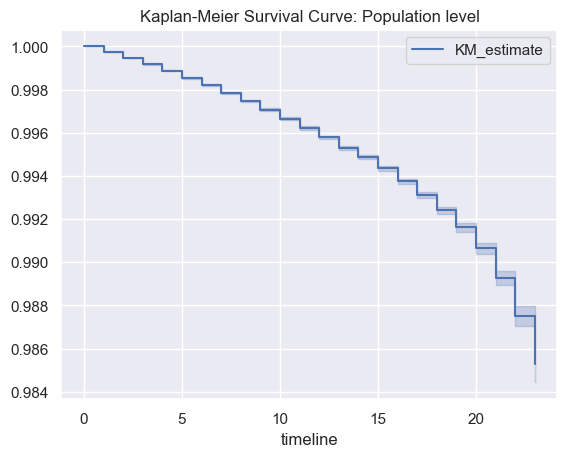

In [25]:
kmf.plot(title='Kaplan-Meier Survival Curve: Population level')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax2 = ax.twinx()

ax2 = kmf.plot_cumulative_density(loc=slice(0, 12))

# ax.set_xticklabels(["202001"] + pred["Month"].astype(str))
# ax.get_legend().remove()
# ax.set_xticks()
# ax2.plot(pred["accounts_charged_off"], color="grey")
pred.plot(x="Month", y="accounts_charged_off", kind="bar", ax=ax, alpha=0.8, color="#E84A27")
ax.set_ylabel("Cumulative # of charged off account")
ax2.set_ylabel("Historical cumulative percentage")
ax2.grid(False)
ax.set_xticklabels(labels=pred["Month"].astype(str), rotation=50)
plt.title("Prediction vs Population Charge Off")
plt.show()

In [26]:
def plot_km(col):

  ax = plt.subplot(111)

  for r in training_df[col].unique():

    ix = training_df[col] == r

    kmf.fit(time[ix], status[ix], label=r)

    kmf.plot(ax=ax)

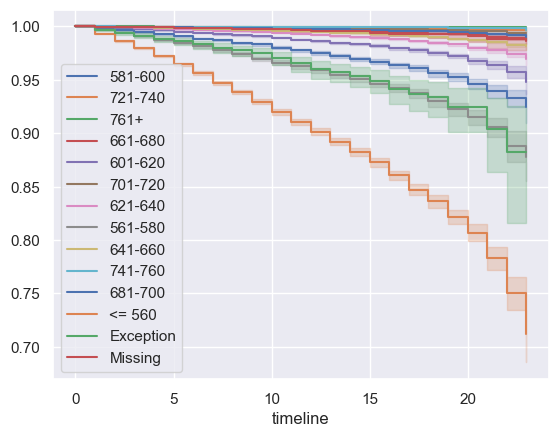

In [27]:
plot_km("bank_fico_buckets_20")

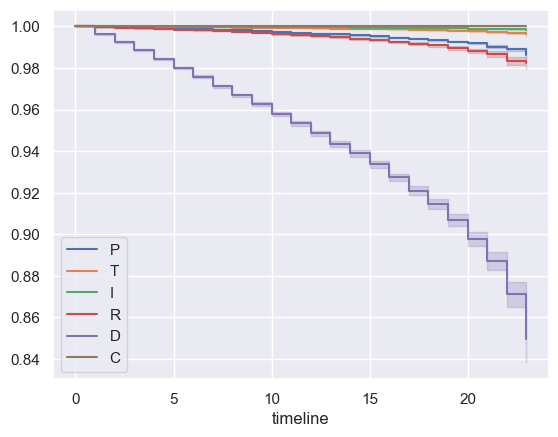

In [28]:
plot_km("net_payment_behaviour_tripd")

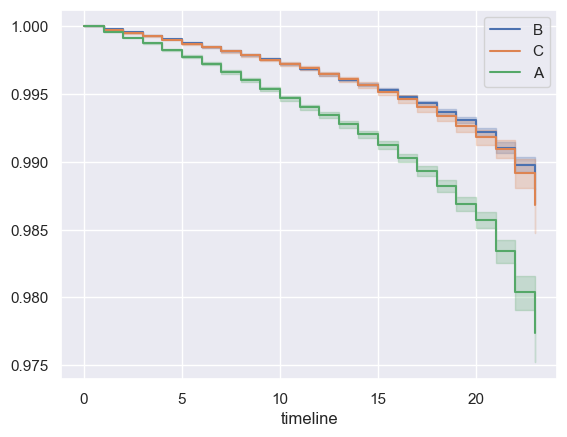

In [29]:
plot_km("industry")

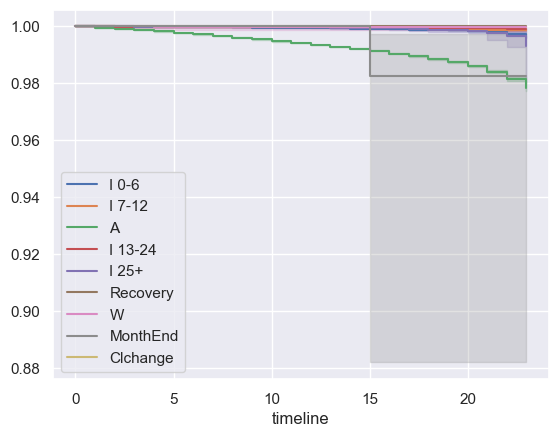

In [30]:
plot_km("account_status_code")

## Preprocessing

In [19]:
print(training_df.dtypes.to_string())

financial_active                 float64
net_payment_behaviour_tripd       object
promotion_flag                     int64
variable_rate_index                int64
account_status_code               object
active_12_mths                   float64
bank_fico_buckets_20              object
mob                                int64
open_closed_flag                 float64
ever_delinquent_flg              float64
nbr_mths_due                     float64
stmt_balance                     float64
prev_balance                     float64
net_sales                        float64
net_payments                     float64
purchase_active                  float64
credit_limit_amt                 float64
credit_limit_pa                  float64
closed                             int64
active                             int64
charge_off                         int64
charge_off_aged                    int64
charge_off_bk                      int64
principal_amt                    float64
principal_amt_ch

In [20]:
one_hot = ["net_payment_behaviour_tripd", "account_status_code", "bank_fico_buckets_20", "industry"]

In [21]:
encoder = OneHotEncoder()
one_code_df = pd.DataFrame(encoder.fit_transform(training_df[one_hot]).toarray())
one_code_df.columns = encoder.get_feature_names_out(one_hot)

In [22]:
one_code_df.head()

net_payment_behaviour_tripd_C  net_payment_behaviour_tripd_D  \
0                            0.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            0.0   
4                            0.0                            0.0   

   net_payment_behaviour_tripd_I  net_payment_behaviour_tripd_P  \
0                            0.0                            1.0   
1                            0.0                            1.0   
2                            0.0                            0.0   
3                            0.0                            0.0   
4                            0.0                            1.0   

   net_payment_behaviour_tripd_R  net_payment_behaviour_tripd_T  \
0                            0.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            1.0   
3                            0.0                            1.0   
4                            0.0                            0.0   

   account_status_code_A  account_status_code_Clchange  \
0                    0.0                           0.0   
1                    0.0                           0.0   
2                    0.0                           0.0   
3                    0.0                           0.0   
4                    1.0                           0.0   

   account_status_code_I 0-6  account_status_code_I 13-24  ...  \
0                        1.0                          0.0  ...   
1                        1.0                          0.0  ...   
2                        0.0                          0.0  ...   
3                        1.0                          0.0  ...   
4                        0.0                          0.0  ...   

   bank_fico_buckets_20_701-720  bank_fico_buckets_20_721-740  \
0                           0.0                           0.0   
1                           0.0                           1.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           1.0   

   bank_fico_buckets_20_741-760  bank_fico_buckets_20_761+  \
0                           0.0                        0.0   
1                           0.0                        0.0   
2                           0.0                        1.0   
3                           0.0                        1.0   
4                           0.0                        0.0   

   bank_fico_buckets_20_<= 560  bank_fico_buckets_20_Exception  \
0                          0.0                             0.0   
1                          0.0                             0.0   
2                          0.0                             0.0   
3                          0.0                             0.0   
4                          0.0                             0.0   

   bank_fico_buckets_20_Missing  industry_A  industry_B  industry_C  
0                           0.0         0.0         1.0         0.0  
1                           0.0         0.0         0.0         1.0  
2                           0.0         1.0         0.0         0.0  
3                           0.0         0.0         1.0         0.0  
4                           0.0         0.0         1.0         0.0  

[5 rows x 32 columns]

In [23]:
training_df = training_df.join(one_code_df)
training_df.drop(one_hot, axis=1, inplace=True)
training_df.head()

financial_active  promotion_flag  variable_rate_index  active_12_mths  mob  \
0               1.0               0                    0             1.0    3   
1               0.0               0                    0             1.0  159   
2               1.0               0                    0             1.0   22   
3               1.0               0                    1             1.0   16   
4               1.0               0                    0             0.0    3   

   open_closed_flag  ever_delinquent_flg  nbr_mths_due  stmt_balance  \
0               1.0                  0.0           0.0         34.77   
1               1.0                  0.0           0.0          0.00   
2               1.0                  0.0           0.0          0.00   
3               1.0                  1.0           0.0          0.00   
4               1.0                  0.0           2.0          0.00   

   prev_balance  ...  bank_fico_buckets_20_701-720  \
0       1918.32  ...                           0.0   
1          0.00  ...                           0.0   
2          0.00  ...                           0.0   
3          0.00  ...                           0.0   
4          0.00  ...                           0.0   

   bank_fico_buckets_20_721-740  bank_fico_buckets_20_741-760  \
0                           0.0                           0.0   
1                           1.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           1.0                           0.0   

   bank_fico_buckets_20_761+  bank_fico_buckets_20_<= 560  \
0                        0.0                          0.0   
1                        0.0                          0.0   
2                        1.0                          0.0   
3                        1.0                          0.0   
4                        0.0                          0.0   

   bank_fico_buckets_20_Exception  bank_fico_buckets_20_Missing  industry_A  \
0                             0.0                           0.0         0.0   
1                             0.0                           0.0         0.0   
2                             0.0                           0.0         1.0   
3                             0.0                           0.0         0.0   
4                             0.0                           0.0         0.0   

   industry_B  industry_C  
0         1.0         0.0  
1         0.0         1.0  
2         0.0         0.0  
3         1.0         0.0  
4         1.0         0.0  

[5 rows x 95 columns]

In [24]:
training_df = pd.merge(training_df, macro_data, left_on="mth_code", right_on="Mnemonic", how="left")


In [25]:
training_df.drop(["mth_code", "snapshot", "Mnemonic"], axis=1, inplace=True)

In [26]:
training_df.shape

(5758219, 189)

In [27]:
training_df.to_csv("training_data_full.csv", index=False)